In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import average_precision_score, confusion_matrix
import matplotlib.pyplot as plt

2024-04-12 22:45:55.511180: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.drop("Time", axis=1, inplace=True)

<Axes: ylabel='count'>

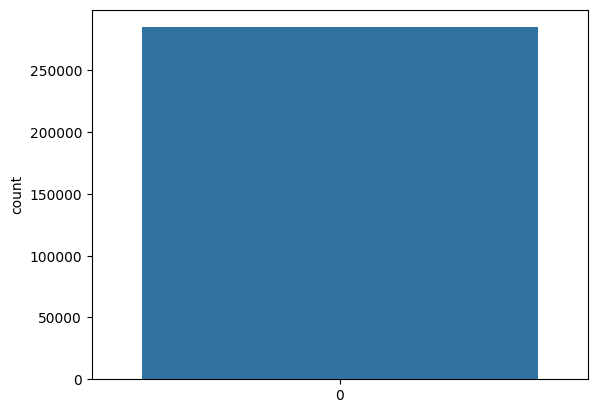

In [6]:
sns.countplot(data["Class"])

In [7]:
data.isnull().any().describe()

count        30
unique        1
top       False
freq         30
dtype: object

In [8]:
limit = int(0.9*len(data))
train = data.loc[:limit]
val_test = data.loc[limit:]
val_test.reset_index(drop=True, inplace=True)
val_test_limit = int(0.5*len(val_test))
val = val_test.loc[:val_test_limit]
test = val_test.loc[val_test_limit:]

In [9]:
print("Number of fraudulent transactions in the validation set: {}"\
      .format(val["Class"].value_counts()[1]))
print("Number of fraudulent transactions in the test set: {}"\
      .format(test["Class"].value_counts()[1]))

Number of fraudulent transactions in the validation set: 11
Number of fraudulent transactions in the test set: 11


In [10]:
train_positive = train[train["Class"] == 1]
train_positive = pd.concat([train_positive] * int(len(train) / len(train_positive)), ignore_index=True)
noise = np.random.uniform(0.9, 1.1, train_positive.shape)
train_positive = train_positive.multiply(noise)
train_positive["Class"] = 1
train_extended = train.append(train_positive, ignore_index=True)
train_shuffled = train_extended.sample(frac=1, random_state=0).reset_index(drop=True)

/tmp/ipykernel_809617/3713326881.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_extended = train.append(train_positive, ignore_index=True)


<Axes: ylabel='count'>

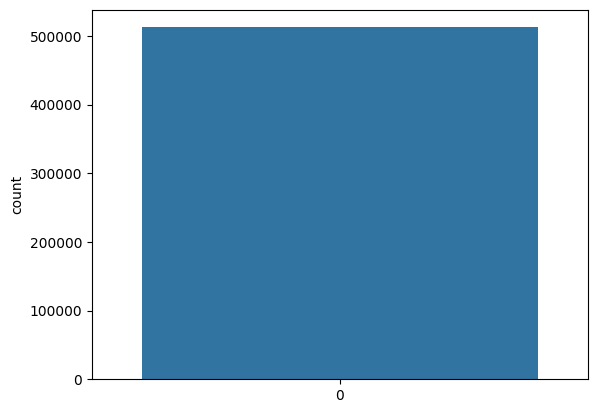

In [11]:
sns.countplot(train_shuffled["Class"])

In [12]:
X_train = train_shuffled.drop(labels=["Class"], axis=1)
Y_train = train_shuffled["Class"]
X_val = val.drop(labels=["Class"], axis=1)
Y_val = val["Class"]
X_test = test.drop(labels=["Class"], axis=1)
Y_test = test["Class"]

In [13]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_val[X_val.columns] = scaler.transform(X_val)
X_test[X_test.columns] = scaler.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(64, activation="relu", input_dim=(X_train.shape[1])))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer=Adam(learning_rate=1e-4), loss="binary_crossentropy", metrics=["accuracy"])
model.summary()
history = model.fit(X_train, 
                    Y_train, 
                    epochs=10, 
                    validation_data=(X_val, Y_val), 
                    callbacks=[ReduceLROnPlateau(patience=3, verbose=1, min_lr=1e-6), 
                               EarlyStopping(patience=5, verbose=1)])

/home/kjf4ec/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-04-12 22:47:36.727575: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 41503 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:81:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,713 (18.41 KB)

 Trainable params: 4,713 (18.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


I0000 00:00:1712976459.115045  809977 service.cc:145] XLA service 0x7f5964004790 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712976459.115107  809977 service.cc:153]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2024-04-12 22:47:39.209134: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-12 22:47:39.514012: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8904


  151/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.5010 - loss: 0.6968  

I0000 00:00:1712976461.630194  809977 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16015/16015 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step - accuracy: 0.8991 - loss: 0.3635 - val_accuracy: 0.9976 - val_loss: 0.2268 - learning_rate: 1.0000e-04
Epoch 2/10
16015/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 931us/step - accuracy: 0.9562 - loss: 0.1705 - val_accuracy: 0.9987 - val_loss: 0.1065 - learning_rate: 1.0000e-04
Epoch 3/10
16015/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 935us/step - accuracy: 0.9560 - loss: 0.1548 - val_accuracy: 0.9992 - val_loss: 0.0895 - learning_rate: 1.0000e-04
Epoch 4/10
16015/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 935us/step - accuracy: 0.9561 - loss: 0.1534 - val_accuracy: 0.9993 - val_loss: 0.0871 - learning_rate: 1.0000e-04
Epoch 5/10
16015/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 934us/step - accuracy: 0.9562 - loss: 0.1528 - val_accuracy: 0.9997 - val_loss: 0.0849 - learning_rate: 1.0000e-04
Epoch 6/10
16015/16015 ━━━━━━━━━━━━━━━━━━━━ 15s 931us/step - accuracy: 0.9564 - loss: 0.1522 - val_accuracy: 0.9996 - val_loss: 0.0849 - learning_rate: 1.0000e-04
Epoch 7/10
16015/16015 ━━━━━━━━━━━━

<Axes: xlabel='Number of Epochs', ylabel='Accuracy'>

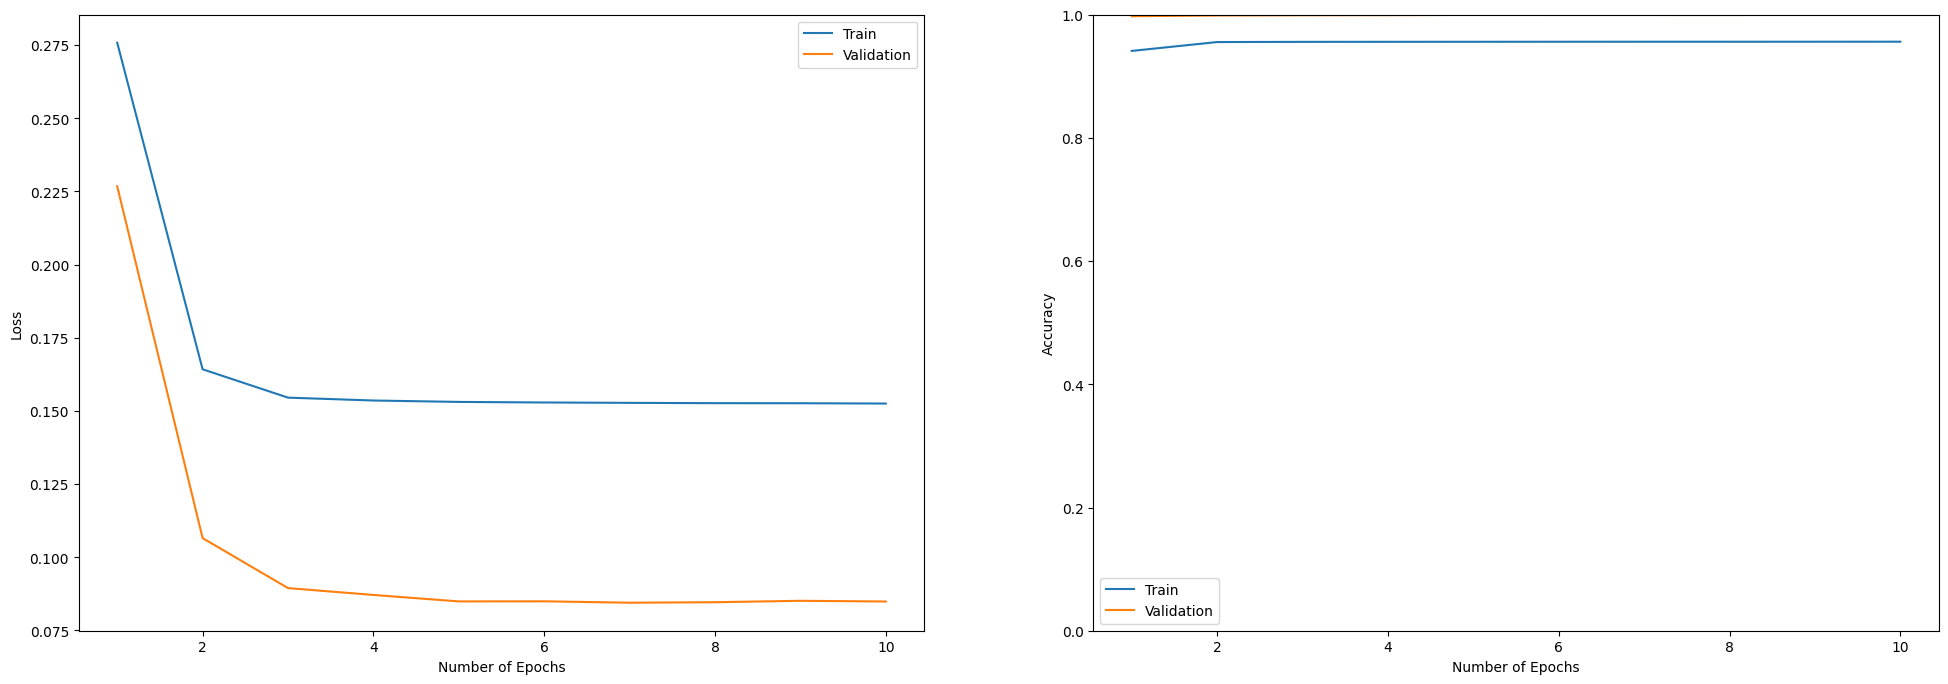

In [17]:
num_epochs = len(history.history["loss"])
fig, axarr = plt.subplots(1, 2, figsize=(24, 8))
axarr[0].set_xlabel("Number of Epochs")
axarr[0].set_ylabel("Loss")
sns.lineplot(x=range(1, num_epochs+1), y=history.history["loss"], label="Train", ax=axarr[0])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_loss"], label="Validation", ax=axarr[0])
axarr[1].set_xlabel("Number of Epochs")
axarr[1].set_ylabel("Accuracy")
axarr[1].set_ylim(0, 1)
sns.lineplot(x=range(1, num_epochs+1), y=history.history["accuracy"], label="Train", ax=axarr[1])
sns.lineplot(x=range(1, num_epochs+1), y=history.history["val_accuracy"], label="Validation", ax=axarr[1])

In [18]:
test_results = model.evaluate(X_test, Y_test)
print("The model test accuracy is {}.".format(test_results[1]))

446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9989 - loss: 0.0873
The model test accuracy is 0.9990871548652649.


In [35]:
predictions = model.predict(X_test)

# Convert probabilities to binary class labels using a threshold
# Common practice is to use 0.5 as the threshold for binary classification
predicted_classes = (predictions > 0.99).astype(int)

# Calculate the average precision score
# Note: average_precision_score function expects true binary labels and predicted probabilities for its calculation,
# if you want to calculate a different metric like accuracy or confusion matrix, then predicted_classes can be used.
ap_score = average_precision_score(Y_test, predicted_classes)

print("The model test average precision score is {}.".format(ap_score))

446/446 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
The model test average precision score is 0.28451222781852653.


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual Negative'), Text(0, 1.5, 'Actual Positive')])

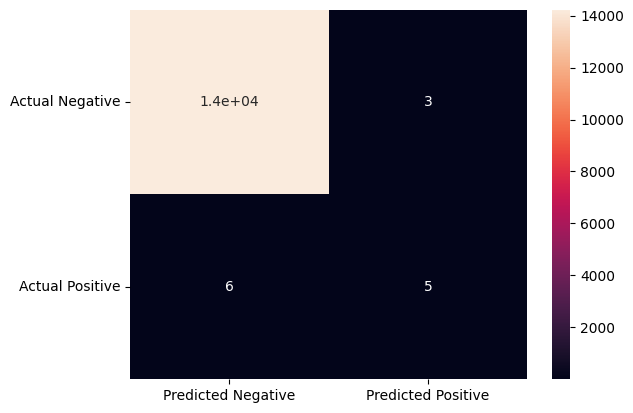

In [36]:
confusion = pd.DataFrame(confusion_matrix(Y_test, predicted_classes))
confusion.columns = ["Predicted Negative", "Predicted Positive"]
confusion.index = ["Actual Negative", "Actual Positive"]
sns.heatmap(confusion, annot=True)
plt.yticks(rotation=0)